Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [ ]:
import pandas as pd
import numpy as np

def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols,index_col='SALE DATE', parse_dates=['SALE DATE'])
    df['BOROUGH'] = df['BOROUGH'].astype('object')
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('$',"").str.replace('-',"").str.replace(',',"").astype('int')
    df = df.loc[df['BUILDING CLASS CATEGORY']=='01 ONE FAMILY DWELLINGS']
    df = df[(df['SALE PRICE']>=100000) & (df['SALE PRICE']<=2000000)]
    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000
2019-01-02,3,MADISON,01 ONE FAMILY DWELLINGS,1932.0,1930.0,1150000
2019-01-02,3,MIDWOOD,01 ONE FAMILY DWELLINGS,1722.0,1920.0,836500
2019-01-02,4,BAYSIDE,01 ONE FAMILY DWELLINGS,1396.0,1930.0,955000
2019-01-02,4,ELMHURST,01 ONE FAMILY DWELLINGS,1260.0,1935.0,820000


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [ ]:
df.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
BUILDING CLASS CATEGORY,3164,1,01 ONE FAMILY DWELLINGS,3164
BOROUGH,3164,5,4,1585
NEIGHBORHOOD,3164,185,FLUSHING-NORTH,98


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [ ]:
target = 'SALE PRICE'
feature = df.columns.drop(['NEIGHBORHOOD','BUILDING CLASS CATEGORY','YEAR BUILT',	'SALE PRICE'])
X = df[feature]
y = df[target]


**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [ ]:
X_train, y_train = pd.DataFrame(X.loc['2019-01':'2019-03']),pd.DataFrame(y.loc['2019-01':'2019-03'])
X_test, y_test = pd.DataFrame(X.loc['2019-04']),pd.DataFrame(y.loc['2019-04'])

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [ ]:
from sklearn.metrics import mean_absolute_error
guess = y_train.mean()
y_pred = [guess]*len(y_train)
baseline_mae = mean_absolute_error(y_train,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 216497.12357684076


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [ ]:
import category_encoders as ce 

ohe = ce.OneHotEncoder(cols = 'BOROUGH', use_cat_names= True)

XT_train = ohe.fit_transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(XT_train,y_train)
y_pred_lr = model_lr.predict(XT_train)
y_pred_lr2 = model_lr.predict(XT_test)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [ ]:
from sklearn.linear_model import RidgeCV
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
model_r = RidgeCV(alphas = alphas, normalize = True)
model_r.fit(XT_train,y_train)
y_pred_r = model_r.predict(XT_train)
y_pred_r2 = model_r.predict(XT_test)
model_r.alpha_

0.01

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [ ]:
training_mae_lr = mean_absolute_error(y_train,y_pred_lr)
test_mae_lr = mean_absolute_error(y_test,y_pred_lr2)

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 180429.48927128347
Linear Test MAE: 184147.32431708105


**Task 10:** Check the training and test metrics for `model_r`.

In [ ]:
training_mae_r = mean_absolute_error(y_train,y_pred_r)
test_mae_r = mean_absolute_error(y_test,y_pred_r2)

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 180404.52260587085
Ridge Test MAE: 184134.950335821


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [ ]:
# Caculate R^2 score
from sklearn.metrics import r2_score
training_r2 = r2_score(y_train,y_pred_r)
test_r2 = r2_score(y_test,y_pred_r2)
print('Training R2:', training_r2)
print('Test R2:', test_r2)

Training R2: 0.30362572308298763
Test R2: 0.27194067252903287


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

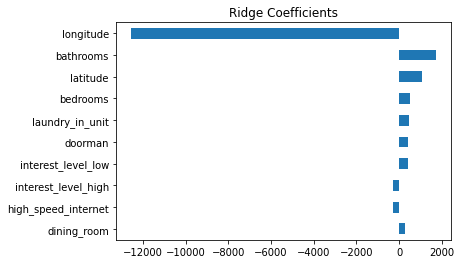

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

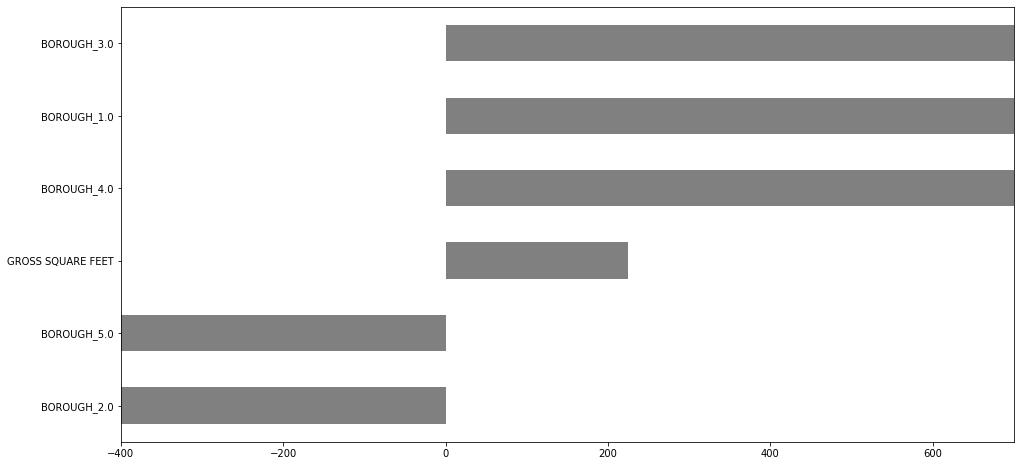

In [ ]:
  import matplotlib.pyplot as plt

  coefficients = pd.Series(model_r.coef_[0], XT_train.columns)
  plt.figure(figsize=(16,8))
  coefficients.sort_values().plot.barh(color='grey')
  plt.xlim(-400,700)
  plt.show()